# 4. Seaborn

Seaborn은 Matplotlib 기반 통계 시각화 라이브러리
* 통계 정보 : 구성, 분포, 관계 등

기본적으로 5가지로 분류 할 수 있다.

* Categorical API
* Distribution API
* Relational API
* Regression API
* Matrix API

## 4-1. Seaborn의 구조

#### 라이브러리와 데이터셋 호출

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
student = pd.read_csv('./StudentsPerformance.csv')
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
834,male,group B,some college,standard,none,58,50,45
497,female,group D,some college,free/reduced,completed,59,78,76
270,male,group C,bachelor's degree,standard,none,69,63,61
770,male,group B,high school,standard,none,52,48,49
545,male,group E,some high school,free/reduced,completed,78,83,80


## 4-2.countplot
* `x`
* `y`
* `data`
* `hue`
    * `hue_order`
* `palette`
* `color`
* `saturate`
* `ax`

`x, y, hue` 등은 기본적으로 pandas df의 feature를 의미한다. `dict`은 `key`를 의미한다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

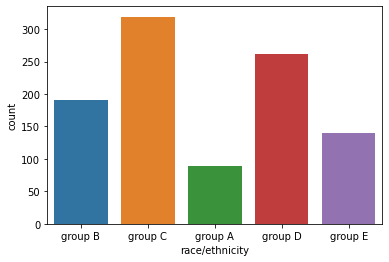

In [8]:
sns.countplot(x='race/ethnicity', data=student)

X, y 축 변경

<AxesSubplot:xlabel='count', ylabel='race/ethnicity'>

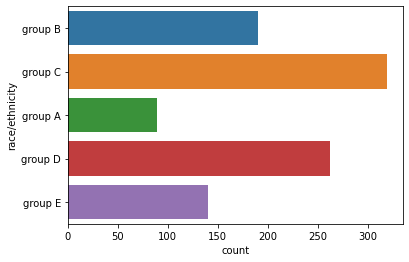

In [9]:
sns.countplot(y='race/ethnicity', data=student)

데이터의 순서는 `order`를 사용해 순서를 명시한다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

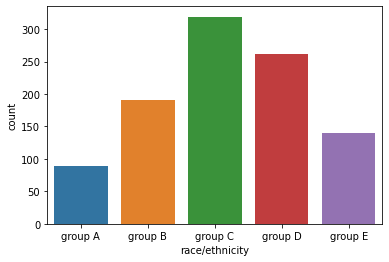

In [10]:
sns.countplot(x='race/ethnicity', data=student,
             order=sorted(student['race/ethnicity'].unique()))

`hue`는 데이터의 구분 기준을 정하여 색상을 통해 내용을 구분한다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

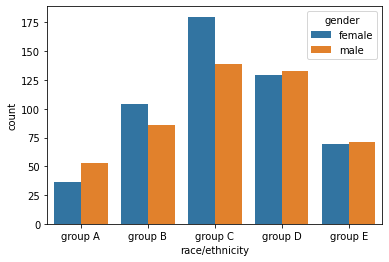

In [11]:
sns.countplot(x='race/ethnicity', data=student,
              hue='gender',
              order=sorted(student['race/ethnicity'].unique())
             )

색은 `palette`를 사용해서 바꿀 수 있다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

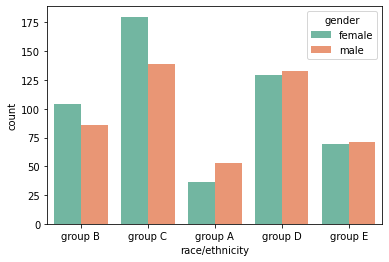

In [12]:
sns.countplot(x='race/ethnicity', data=student,
             hue='gender', palette='Set2'
             )

color를 사용하면 같은 색상으로 sequential하게 표현 할 수 있다.

<AxesSubplot:xlabel='gender', ylabel='count'>

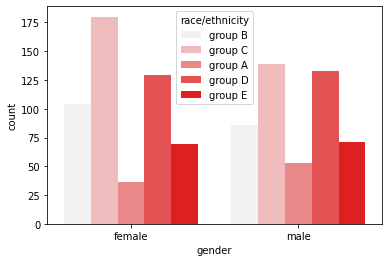

In [14]:
sns.countplot(x='gender', data=student,
             hue='race/ethnicity', color='red'
             )

`hue_order`로 색으로 구분하며 순서까지 정해줄 수 있다.

<AxesSubplot:xlabel='gender', ylabel='count'>

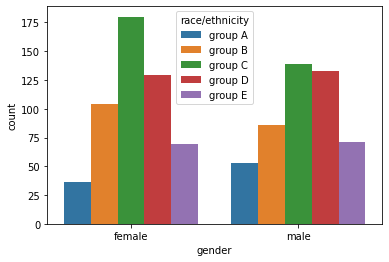

In [15]:
sns.countplot(x='gender', data=student,
             hue='race/ethnicity',
              hue_order=sorted(student['race/ethnicity'].unique())#, color='red'
             )

`ax`를 사용해 그릴 수도 있다.

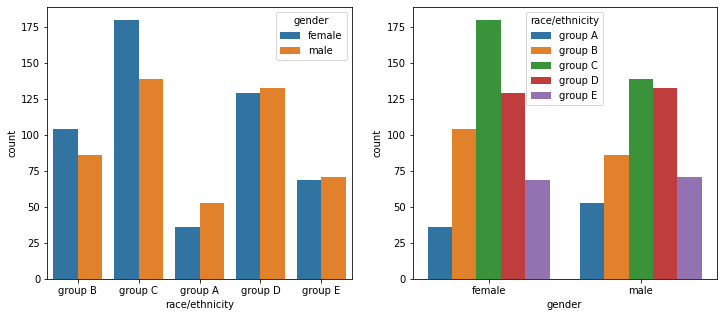

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='race/ethnicity', data=student,
             hue='gender',
             ax=axes[0]
             )

sns.countplot(x='gender', data=student,
             hue='race/ethnicity',
             hue_order=sorted(student['race/ethnicity'].unique()),
             ax=axes[1]
             )

plt.show()

## 4-3. Categorical API

* `count`
    * missing value

데이터가 정규분포에 가깝다면 정규분포의 모수인 평균과 표준편차를 보자.
* `mean`, `std`

그러나 데이터가 정규분포에 가깝지 않다면 다른 방식으로 대표값을 뽑아보자.
> 직원 월급 평균에서 임원의 월급을 빼는 방법, 중간값을 보는 방법

분위수는 자료의 크기 순서에 따른 위치 값으로 일반적으로 백분위값으로 표기한다.

* 사분위수 : 데이터를 4등분한 관측값
    * `min`, `25%`, `50%`, `75%`, `max`

In [17]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 4-3-1. Box plot

사분위수를 중심으로 시각화를 한다.

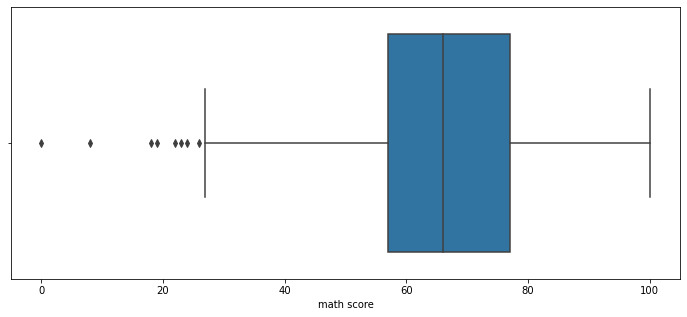

In [18]:
fig, ax = plt.subplots(1,1 , figsize=(12, 5))
sns.boxplot(x='math score', data=student, ax=ax)
plt.show()

* interquartile range(IQR) : 25th to the 75th percentile.

boxplot에서의 outlier는 whisker, outlier등으로 표현한다.
* whisker : 박스 외부에 범위를 나타내는 선
* outlier : -IQR*1.5 와 +IQR*1.5을 벗어나는 값

왼쪽과 오른쪽 막대는 각각 +- IQR*1.5 범위를 나타낸다.

Whisker의 좌우 길이가 같지 않은 이유는 오른쪽의 whisker는 최댓값인 100에서 끝나기 때문이다.

* min : -IQR*1.5 보다 크거나 같은 값들 중 `최솟값`
* max : +IQR*1.5 보다 작거나 같은 값들 중 `최댓값`

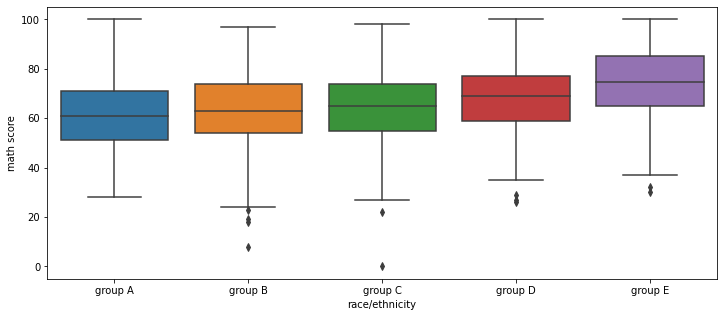

In [19]:
fig, ax = plt.subplots(1,1 , figsize=(12, 5))
sns.boxplot(x='race/ethnicity', y='math score', data=student,
           order=sorted(student['race/ethnicity'].unique()),
           ax=ax)

plt.show()

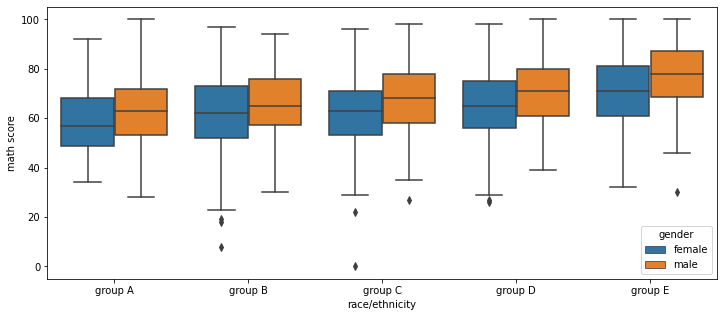

In [20]:
fig, ax = plt.subplots(1,1 , figsize=(12, 5))
sns.boxplot(x='race/ethnicity', y='math score', data=student,
            hue='gender',
           order=sorted(student['race/ethnicity'].unique()),
           ax=ax)

plt.show()

#### boxplot 시각화 커스텀
* `width`
* `linewidth`
* `fliersize`

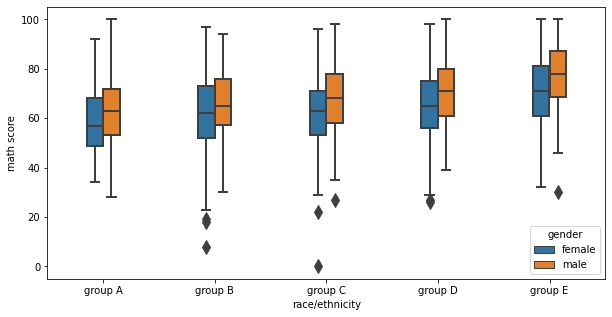

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

sns.boxplot(x='race/ethnicity', y='math score', data=student,
           hue='gender',
           order=sorted(student['race/ethnicity'].unique()),
            width=0.3,
            linewidth=2,
            fliersize=10,
            ax=ax)
plt.show()

## 4-3-2. Violin plot

box plot은 대푯값은 잘 보여주지만, 실제 분포의 표현이 부족하여 실제 분포의 표현을 잘 보여주기 위한 plot으로 Vioin plot을 사용한다.

흰점이 50%, 중간 검정 막대가 IQR 범위를 의미한다.

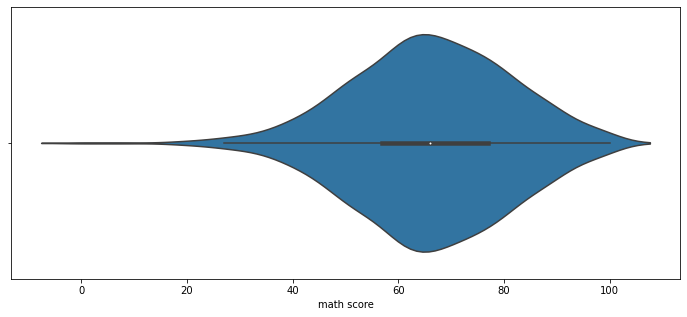

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.violinplot(x='math score', data=student, ax=ax)
plt.show()

다만 Violin plot은 이하의 오해가 생길 수 있다.
* 데이터는 연속적이지 않은 categorical 형태인데도 연속적으로 표현하여 데이터의 손실과 오차가 존재한다.
    * 이때 kernel density estimate를 사용한다.
* 위와 같은 문제로 데이터의 범위가 없는 데이터까지 근사하여 표시한다.
    * 100점보다 높은 점수는 없는데 있는것처럼, 0보다 작은 점수도 없는데 있는것처럼 표현
    
이런 오해를 줄이고 정보량을 높이는 방법이 존재한다.

* `bw`(bend widths) :  분포 표현을 얼마나 자세하게 보여줄 것인가
    * 'scott','silverman', float
* `cut` : 끝부분을 얼마나 자를 것인가?
    * float
* `inner` : 내부를 어떻게 표현할 것인가
    * "box", "quartile", "point", "stick", None

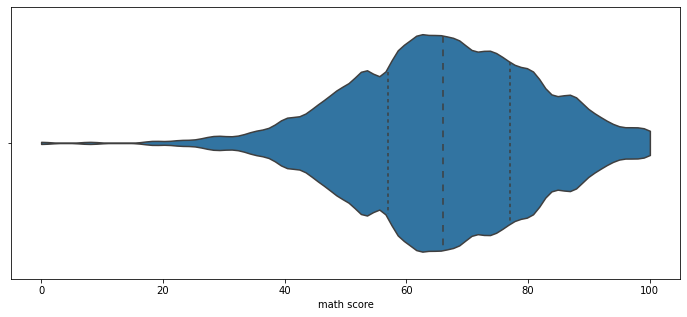

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.violinplot(x='math score', data=student, ax=ax,
              bw=0.1,
               cut=0,
               inner='quartile'
              )
plt.show()

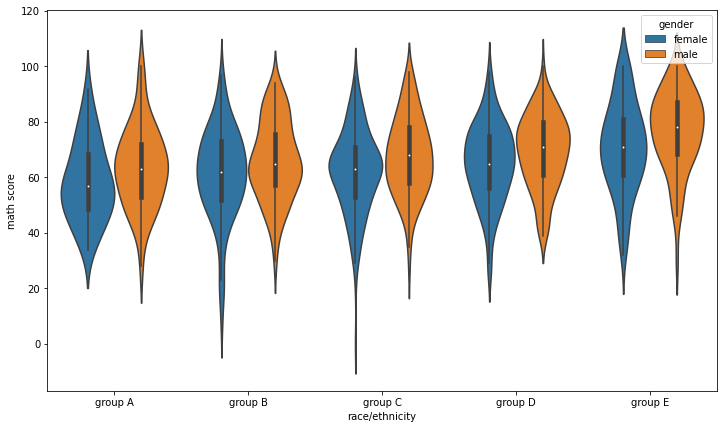

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
              hue='gender', order=sorted(student['race/ethnicity'].unique())
              )
plt.show()